These the imported libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Scikit-learn libraries
- skilearn.preprocessing.MinMaxScaler is a tool for scaling and normalizing data
- sklearn.metrics.mean_squared_error is function for compute the mean and square error (MSE).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Keras libraries
- keras.models.Sequential is to build linear stack of leayer for the neural network
- keras.layers.LSTM is a layer type for short term memory (Useful for sequence prediction task)
- keras.layers.Dense for a fully connected nerula network layer
- Keraas.layers.Dropout is a layer in keras to prevent overfitting by randomly dropping some during the training.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

yfinance is a library from Yahoo Finance. This library contain historical market data that can be download.

In [ ]:
import yfinance as yf

Using yf.download to fetch the data from the Yahoo historical market data.
DOGE-USD is the ticker symbol for the crypto currency. (Ticker symbol just mean the cypto name) The "-USD" is for the US dollar since I want to trade against US.

Start and end for the historical data. The specific data frequency. "1d" stand for the daily data.

In [ ]:
crypto_data = yf.download('SHIB-USD', start='2023-01-01', end='2024-11-23', interval='1d')

[*********************100%***********************]  1 of 1 completed


SMA stand for the "Simple Moving Average" which is rechincal indicator in financila analysis it calculate the average of the closing prices in the number of closing days.

.rolling(window=10) is creating a window size of 10 dyas
mean() calculate the average
crypto_data['SMA_10] is adding a new column to store the 10 days SMA values.

The reason why I am using the 10 days and 50 days:
10 days for short term trends and 50 days for the long terms track slower trends.



In [ ]:
crypto_data['SMA_10'] = crypto_data['Close'].rolling(window=10).mean()
crypto_data['SMA_50'] = crypto_data['Close'].rolling(window=50).mean()

Close: Final prices at the end of the trading day
Volume: The amount fo crypto traded that day
SMA_10: The average 10 days of the closing price
SMA_50: The average 50 days of the closing price

Clean the data and remove everything else


In [ ]:
crypto_data = crypto_data[['Close', 'Volume', 'SMA_10', 'SMA_50']]
crypto_data.dropna(inplace=True)
print(crypto_data.head())

Price          Close     Volume    SMA_10    SMA_50
Ticker      SHIB-USD   SHIB-USD                    
Date                                               
2023-02-19  0.000013  469758008  0.000013  0.000011
2023-02-20  0.000013  327213805  0.000013  0.000012
2023-02-21  0.000013  344708123  0.000013  0.000012
2023-02-22  0.000013  281815699  0.000013  0.000012
2023-02-23  0.000013  427737260  0.000013  0.000012


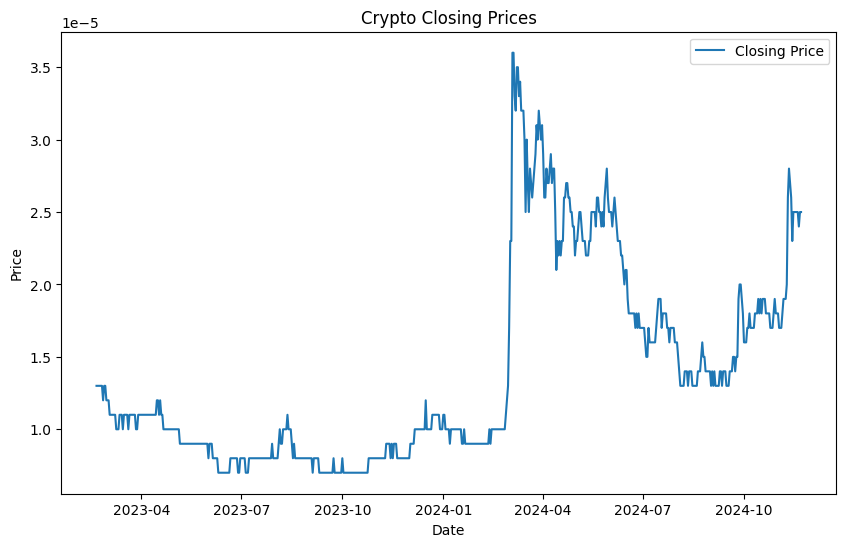

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(crypto_data['Close'], label='Closing Price')
plt.title('Crypto Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

MinMaxScaler is a normalization technique from sckit-learn that scales data into a specific range. For this case I used (0,1)

For example if my data is [5, 10, 15] and if I change it to (0,1) it will be [0, 0.5 , 1]

scaled_data im just converting the cypto data into a numpy array to process and using scaler.fit_transform to calculate the closing prices.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data.values)